<a href="https://www.kaggle.com/code/rodolphojustino/classification-ml-for-iris-db?scriptVersionId=121474851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Author: Rodolpho Justino

This study is part of a classification ML algorithm for the prediction of the species of a flower called "Iris" based on the lengh and width of the petal and sepal.

the species are: Versicolor, Setosa and Virginica

The dataset is available as part of the built-in library of seaborn library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

A first step is to define a function that represents a decision tree of the problem

In [2]:
model = DecisionTreeClassifier()

In [3]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Obtaining more information about the dataset

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is no missing data and the data types are consistent with the data, we can proceed exploring the dataset

In [5]:
iris_df.query("species == 'versicolor'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


In [6]:
iris_df.query("species == 'virginica'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


In [7]:
iris_df.query("species == 'setosa'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


We note from the data that there are differences in the three species:

* The sepal length of the Virginica Species is the largest, Setosa is the smallest
* The sepal width of the Setosa species is the largest, Versicolor is the smallest
* The data set has the same amount of data for the 3 different species, 50 of each

We can have a better understanding of this using some visualization

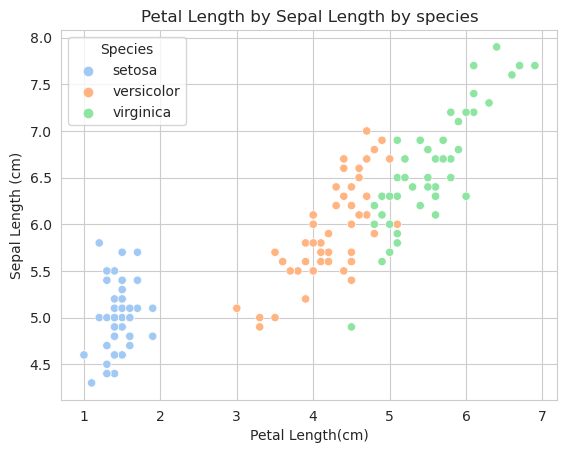

In [8]:
with sns.axes_style('whitegrid'):
    graph = sns.scatterplot(data = iris_df, x = "petal_length", y = "sepal_length", hue = "species", palette = "pastel")
    graph.set(title = "Petal Length by Sepal Length by species", xlabel = "Petal Length(cm)", ylabel = "Sepal Length (cm)")
    graph.get_legend().set_title("Species")

Based on the graph above, we see that in general, the setosa species is a smaller flower, whereas the versicolar and virginia are bigger, virginica being the largest